### Knock11: Data を読み込んで不要なものを除外しよう

In [1]:
# 注文 Data を読み込み中身を確認
import pandas as pd

order_data = pd.read_csv('order_data.csv')
print(order_data.shape[0])
order_data.head()

703880


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


In [2]:
# 今回の分析で必要ない Data を除外
order_data = order_data.loc[
    (order_data['status'] == 1)
    | (order_data['status'] == 2)
    ]
print(order_data.shape[0])
order_data.columns

574436


Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

金額が Main の分析対象になるため、受付(status=0), キャンセル(status=9)は、除外

In [3]:
# 不要な項目を除外
analyze_data = order_data[
    ['store_id', 'customer_id', 'coupon_cd', 'order_accept_date', 'delivered_date', 'total_amount', 'store_name',
     'wide_area', 'narrow_area', 'takeout_name', 'status_name']]
print(analyze_data.shape)
analyze_data.head()

(574436, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,49,C26387220,50,2020-04-01 11:00:00,2020-04-01 11:18:00,4144,浅草店,東京,東京,お持ち帰り,お支払済
1,85,C48773811,26,2020-04-01 11:00:00,2020-04-01 11:22:00,2877,目黒店,東京,東京,デリバリー,お渡し済
2,76,C66287421,36,2020-04-01 11:00:00,2020-04-01 11:15:00,2603,本郷店,東京,東京,デリバリー,お渡し済
3,190,C41156423,19,2020-04-01 11:00:00,2020-04-01 11:16:00,2732,栃木店,北関東,栃木,デリバリー,お渡し済
4,191,C54568117,71,2020-04-01 11:00:00,2020-04-01 11:53:00,2987,伊勢崎店,北関東,群馬,デリバリー,お渡し済


Record 数や項目数が非常に多い Data を扱う場合、処理対象の Data をなるべく少なくしておいた方が
- 処理速度
- Memory 使用量

の面で良い。

### Knock12: Data の全体像を把握しよう

In [4]:
# 分析用 Data の統計量を確認
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574436.000000,574436.000000,574436.000000
mean,99.113844,49.478758,2960.087555
std,55.913615,28.888993,954.282731
min,1.000000,0.000000,698.000000
25%,51.000000,24.000000,2308.000000
50%,99.000000,49.000000,2808.000000
75%,147.000000,75.000000,3617.000000
max,196.000000,99.000000,5100.000000


In [5]:
# Data 型を確認
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [6]:
# 一部の数値型の項目を文字列型に変更
analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

C:\Users\leone\dsLab\machine_learning_system_100_knocks\.venv\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [7]:
# Warning を表示しない
import warnings

warnings.filterwarnings('ignore')

In [8]:
analyze_data.describe()

,total_amount
count,574436.000000
mean,2960.087555
std,954.282731
min,698.000000
25%,2308.000000
50%,2808.000000
75%,3617.000000
max,5100.000000


ここで確認できる値
- 全体としての統計
- Pizza chain の Group 全体としての売上がどうなのか

### Knock13: 月別の売上を集計してみよう
Data を月別に集計していく

In [9]:
# 日時の項目を Datetime型に変換し年月項目を作成
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])
analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')
analyze_data[['order_accept_date', 'order_accept_month']].head()

,order_accept_date,order_accept_month
0,2020-04-01 11:00:00,202004
1,2020-04-01 11:00:00,202004
2,2020-04-01 11:00:00,202004
3,2020-04-01 11:00:00,202004
4,2020-04-01 11:00:00,202004


In [10]:
# delivered_date も同様に型変換
analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])
analyze_data['delivered_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')
analyze_data[['delivered_date', 'delivered_month']].head()

,delivered_date,delivered_month
0,2020-04-01 11:18:00,202004
1,2020-04-01 11:22:00,202004
2,2020-04-01 11:15:00,202004
3,2020-04-01 11:16:00,202004
4,2020-04-01 11:53:00,202004


- 複数の日時項目が存在する場合、各項目の差分を計算して所要日数や所要時間を取得する Case もある。
- 型の変換が中途半端だと、いざ使用とした時に混乱することがある為、すぐ使用しなくても型は揃えておくのが良い。

In [11]:
# Data 型の確認
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date        datetime64[ns]
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
delivered_month               object
dtype: object

In [12]:
# 統計 Data を月月で確認
month_data = analyze_data.groupby('order_accept_month')
month_data.describe()

total_amount                                          \
                          count         mean         std    min     25%   
order_accept_month                                                        
202004                 189414.0  2959.440638  954.271169  698.0  2308.0   
202005                 195684.0  2960.327799  954.823248  698.0  2308.0   
202006                 189338.0  2960.486437  953.740057  698.0  2308.0   

                                            
                       50%     75%     max  
order_accept_month                          
202004              2808.0  3586.0  5100.0  
202005              2808.0  3586.0  5100.0  
202006              2808.0  3617.0  5100.0

In [13]:
# 合計金額の確認
month_data.sum()

,total_amount
order_accept_month,
202004,560559489
202005,579288785
202006,560532581


#### 集計
- 月別
- 地域別
- 店舗別

集計する視点を変えることで、Simple に分析を始めていくことができる。

### Knock14: 月別の推移を可視化してみよう
- 表形式は値の比較に向いていない。（※表の中から数字を拾って比較する、という Step が見る側に求められ、全体を正しく順位付けするために頭の中で計算し続ける必要がある為。）
- Graph を利用して可視化すると計算するまでもなく直感的な理解が得られる。
- 情報を落としつつもわかりやすく可視化する行為は奥が深い。

<AxesSubplot:xlabel='order_accept_month'>

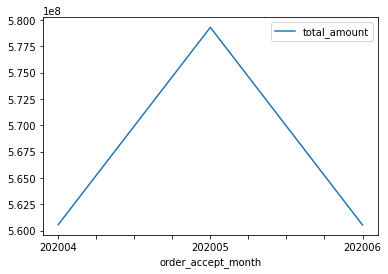

In [14]:
import matplotlib.pyplot as plt
month_data.sum().plot()

単純に数字で比較するよりも、５月の売上が他よりも伸びていることを直感的に捉えられる。

<AxesSubplot:xlabel='order_accept_month'>

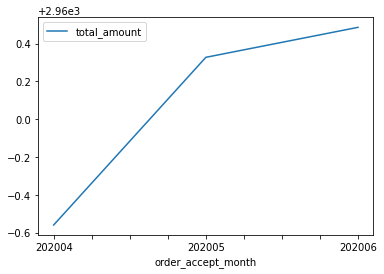

In [15]:
# 売上の平均額を可視化
month_data.mean().plot()

傾向を見ていくと普段の売上がどの程度で、売上が上がったときどのような施策を打っていたかなどの分析をすることができる。

### Knock15: 売上から　Histogram を作成してみよう
Histogram を作成することで売上の分布を見ることができる。

(array([ 21524.,      0.,  48969., 135664., 111217.,  77622.,  54146.,
         59814.,  34394.,  31086.]),
 array([ 698. , 1138.2, 1578.4, 2018.6, 2458.8, 2899. , 3339.2, 3779.4,
        4219.6, 4659.8, 5100. ]),
 <BarContainer object of 10 artists>)

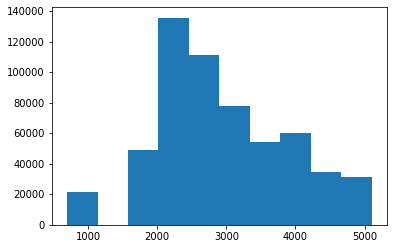

In [16]:
# Histogram を出力
plt.hist(analyze_data['total_amount'])

- 地域や店舗といった単位でみることで、客層の特徴を掴む手がかりに使える。
- 次の施策を練る上でも大事な要素になる。
- Party menu を用意する場合に、どのくらいの価格まで許容され、需要と Match するかなど検討する材料になる。

(array([10728., 10796.,     0.,     0.,     0., 48969., 45777., 78334.,
        23175., 66451., 44368., 38745., 27653., 42503., 12508., 35285.,
        23739., 11151., 23168., 22649.,  8437.]),
 array([ 698.        ,  907.61904762, 1117.23809524, 1326.85714286,
        1536.47619048, 1746.0952381 , 1955.71428571, 2165.33333333,
        2374.95238095, 2584.57142857, 2794.19047619, 3003.80952381,
        3213.42857143, 3423.04761905, 3632.66666667, 3842.28571429,
        4051.9047619 , 4261.52380952, 4471.14285714, 4680.76190476,
        4890.38095238, 5100.        ]),
 <BarContainer object of 21 artists>)

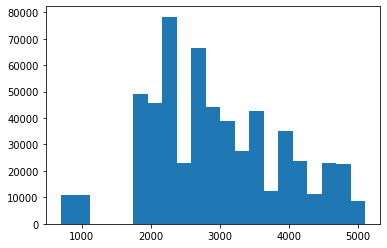

In [17]:
# もう少し階級が細かい Histogram
plt.hist(analyze_data['total_amount'], bins=21)

- どの粒度で見るべきかは状況によって変わる。
- まずは自動的に出力されたものを見るところから始める。
- あまり細かくしぎると、１つの凹凸に対する説明が難しくなる。
- Bin を変えることで
    - どのような傾向が見られるか
    - どのように読み解くことができるか
    - その説明に納得感が得られるか
を考えると良い。

### Knock16: 都道府県別の売上を集計して可視化しよう
- 分析をする際は大きなところから捉えて Break down していくのが Smooth.
月別かつ都道府県別の売上を Pivot table を使った Cross 集計で表示していく。

In [18]:
pre_data = pd.pivot_table(analyze_data, index='order_accept_month', columns='narrow_area', values='total_amount', aggfunc='mean')
pre_data

narrow_area,千葉,埼玉,東京,栃木,神奈川,群馬,茨城
order_accept_month,,,,,,,
202004,2959.062000,2976.519634,2960.592173,2992.173548,2948.001171,2942.046543,2947.479814
202005,2953.545504,2977.290771,2962.603059,2998.165682,2949.597054,2948.269611,2941.796835
202006,2955.761885,2976.988380,2962.949987,2991.542844,2950.520464,2945.504744,2935.951783


特徴を容易に捉えるための可視化が必要になってくる。

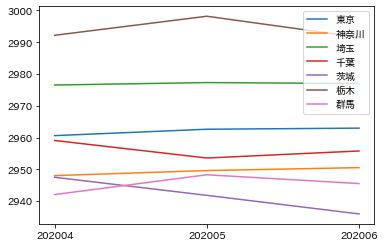

In [19]:
import japanize_matplotlib
plt.plot(list(pre_data.index), pre_data['東京'], label='東京')
plt.plot(list(pre_data.index), pre_data['神奈川'], label='神奈川')
plt.plot(list(pre_data.index), pre_data['埼玉'], label='埼玉')
plt.plot(list(pre_data.index), pre_data['千葉'], label='千葉')
plt.plot(list(pre_data.index), pre_data['茨城'], label='茨城')
plt.plot(list(pre_data.index), pre_data['栃木'], label='栃木')
plt.plot(list(pre_data.index), pre_data['群馬'], label='群馬')
plt.legend()